
Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**.

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;




# Descripción del proyecto

## Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

### Primero cargamos los datos y las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Correcciones de los datos

In [2]:
# Convertir nombres de columnas a minúsculas y snake_case
hypotheses.columns = hypotheses.columns.str.lower()
orders.columns = ['transaction_id' if col == 'transactionId' else 'visitor_id' if col == 'visitorId' else 'date' if col == 'date' else 'revenue' if col == 'revenue' else 'group' for col in orders.columns]

# Convertir tipos de columnas en 'orders'
orders['transaction_id'] = orders['transaction_id'].astype(str)
orders['visitor_id'] = orders['visitor_id'].astype(str)
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

# Convertir tipos de columnas en 'visits'
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

### Luego hacemos una revisión de los datos

In [3]:
# Revisar la estructura de los datos
print("\n--- Hypotheses Info ---\n")
hypotheses.info()
print("\n--- Hypotheses Head ---\n")
print(hypotheses.head())

print("\n--- Orders Info ---\n")
orders.info()
print("\n--- Orders Head ---\n")
print(orders.head())

print("\n--- Visits Info ---\n")
visits.info()
print("\n--- Visits Head ---\n")
print(visits.head())



--- Hypotheses Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

--- Hypotheses Head ---

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7 

### Finalmente comprobamos si hay duplicados y valores nulos

In [4]:
# Comprobar duplicados
duplicated_hypotheses = hypotheses.duplicated().sum()
duplicated_orders = orders.duplicated().sum()
duplicated_visits = visits.duplicated().sum()
print(f"\nDuplicados en Hypotheses: {duplicated_hypotheses}")
print(f"Duplicados en Orders: {duplicated_orders}")
print(f"Duplicados en Visits: {duplicated_visits}")

# Comprobar valores nulos
nulls_hypotheses = hypotheses.isnull().sum()
nulls_orders = orders.isnull().sum()
nulls_visits = visits.isnull().sum()
print("\nValores nulos en Hypotheses:\n", nulls_hypotheses)
print("\nValores nulos en Orders:\n", nulls_orders)
print("\nValores nulos en Visits:\n", nulls_visits)


Duplicados en Hypotheses: 0
Duplicados en Orders: 0
Duplicados en Visits: 0

Valores nulos en Hypotheses:
 hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Valores nulos en Orders:
 transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Valores nulos en Visits:
 date      0
group     0
visits    0
dtype: int64


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Excelente manejo de la carga de datos y de las correcciones iniciales. Convertir los nombres de columnas a `snake_case` y asegurarte de que los tipos de datos sean los correctos es fundamental para evitar errores posteriores. También es positivo que hayas validado la integridad de los datos al comprobar duplicados y valores nulos. </div>

### Conclusiones de la revisión de los datos

1. Cargamos y revisamos tres datasets: `hypotheses`, `orders` y `visits`.
2. Ajustamos los nombres de las columnas en el dataframe `hypotheses` para que estén en minúsculas.
3. Convertimos los nombres de las columnas en el dataframe `orders` que contenían dos palabras a formato `snake_case`.
4. Cambiamos los tipos de datos de las columnas de ID en el dataframe `orders` a tipo string.
5. Convertimos las columnas de fecha en los dataframes `orders` y `visits` al tipo `datetime`.
6. No encontramos duplicados ni valores nulos en ninguno de los datasets.

## Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [5]:
# Aplicar el framework ICE para priorizar hipótesis
hypotheses['ice_score'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
ordered_ice = hypotheses.sort_values(by='ice_score', ascending=False)
print("\n--- Prioridad de hipótesis utilizando ICE ---\n")
print(ordered_ice[['hypothesis', 'ice_score']])

# Aplicar el framework RICE para priorizar hipótesis
hypotheses['rice_score'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
ordered_rice = hypotheses.sort_values(by='rice_score', ascending=False)
print("\n--- Prioridad de hipótesis utilizando RICE ---\n")
print(ordered_rice[['hypothesis', 'rice_score']])

# Comparar la priorización entre RICE e ICE
print("\n--- Comparación de priorización: RICE vs ICE ---\n")
comparison = ordered_rice[['hypothesis', 'rice_score']].merge(ordered_ice[['hypothesis', 'ice_score']], on='hypothesis', how='outer')
print(comparison)


--- Prioridad de hipótesis utilizando ICE ---

                                          hypothesis  ice_score
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

--- Prioridad de hipótesis utilizando RICE ---

                                          hypothesis  rice_score
7  Add a subscription form to all the main pages....       112.0
2  Add product recommendation blocks to the store...        56.0
0  Add two new channels for attracting traffic. T...        40.0
6  

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen uso de los frameworks ICE y RICE para priorizar hipótesis. Es importante que hayas aplicado ambos métodos y comparado cómo cambia la priorización al introducir el factor de "Reach". La explicación de por qué algunas hipótesis suben de posición al usar RICE está bien fundamentada. </div> 

### Explicación de los cambios en la priorización
La priorización de las hipótesis cambió significativamente al utilizar RICE en lugar de ICE.
- Por ejemplo, la hipótesis ``'Add a subscription form to all the main pages'`` pasó de la cuarta posición en ICE a la primera en RICE, debido a su alto valor de Reach. Esto demuestra cómo el factor de alcance (Reach) influye considerablemente en la priorización cuando se utiliza RICE.
- Las hipótesis con un mayor alcance, como ``'Add a subscription form'`` y ``'Add product recommendation blocks'``, obtuvieron una mayor prioridad con RICE, mientras que las hipótesis con menor alcance, como ``'Launch your own delivery service'``, se movieron hacia abajo.
- Al tener en cuenta el alcance, RICE nos permite enfocar esfuerzos en iniciativas que afectarán a una mayor cantidad de usuarios.

## Parte 2. Análisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

### Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

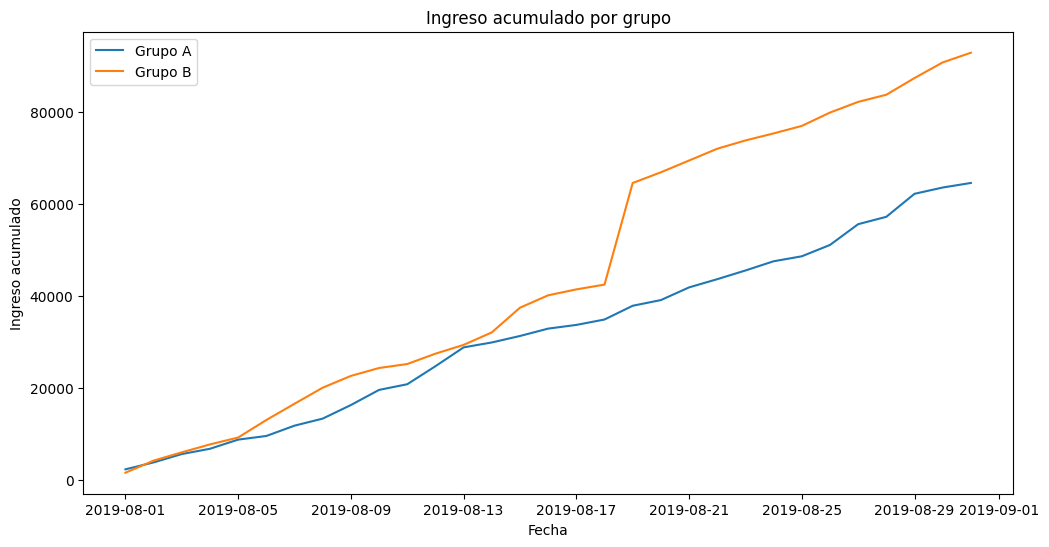

In [6]:
# Ingreso acumulado por grupo
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(data['date'], data['revenue'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')
plt.legend()
plt.show()


    
<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La visualización del ingreso acumulado por grupo está muy bien presentada, y las conclusiones sobre la superioridad del Grupo B son acertadas. Es valioso que hayas notado el crecimiento constante del Grupo A, pero enfatizado que el Grupo B es más rentable en este aspecto. </div> 

#### Conclusiones:
- **Desempeño Superior del Grupo B**: La tendencia muestra que el Grupo B no solo ha tenido un tamaño promedio de pedido mayor en ciertos momentos, sino que esta ventaja se traduce también en ingresos acumulados mayores. Esto sugiere que el Grupo B es más rentable.
  
- **Consistencia del Crecimiento del Grupo A**: Aunque el Grupo A presenta un crecimiento constante, este no es tan pronunciado como el del Grupo B, lo que implica que sus ingresos acumulados son menores.

#### Conjeturas:
- **Impacto de Estrategias o Factores Externos en el Grupo B**: Dado que el Grupo B ha logrado ingresos acumulados mayores, es posible que este grupo haya estado sujeto a estrategias que aumentaron sus pedidos (como promociones especiales) o que haya un comportamiento más favorable de los usuarios en este grupo.


---

- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

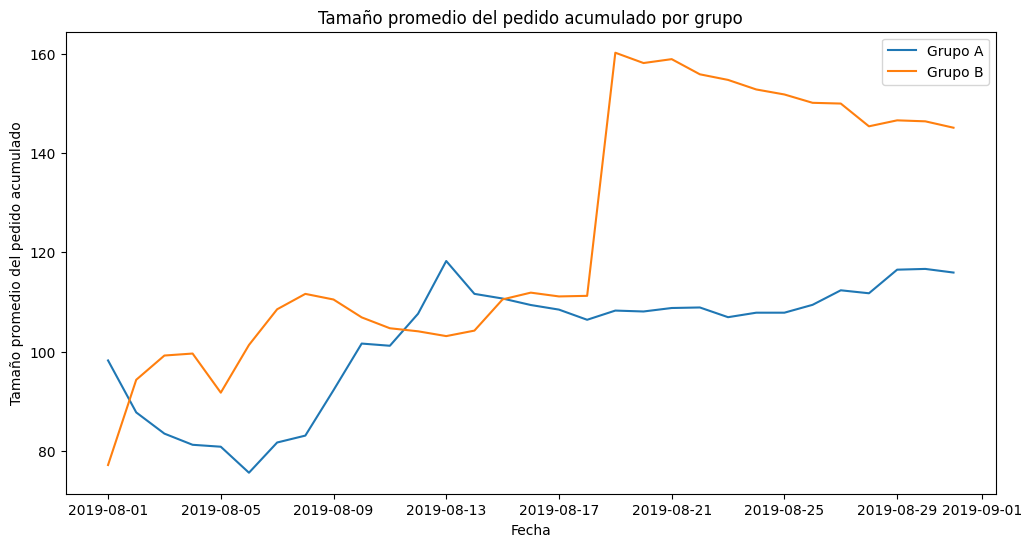

In [7]:
# Tamaño de pedido promedio acumulado por grupo
cumulative_orders = orders.groupby(['date', 'group']).agg({'transaction_id': 'count', 'revenue': 'sum'}).groupby(level=1).cumsum().reset_index()
cumulative_orders['avg_order_value'] = cumulative_orders['revenue'] / cumulative_orders['transaction_id']

plt.figure(figsize=(12, 6))
for group in cumulative_orders['group'].unique():
    data = cumulative_orders[cumulative_orders['group'] == group]
    plt.plot(data['date'], data['avg_order_value'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio del pedido acumulado')
plt.title('Tamaño promedio del pedido acumulado por grupo')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buena visualización del tamaño promedio de pedido acumulado. La observación de que el Grupo B supera al Grupo A en la segunda mitad del período es útil y señala un posible impacto positivo en las estrategias aplicadas. </div> 

#### Conclusiones:
- **Ventaja del Grupo B**: Aunque al inicio ambos grupos presentan tamaños promedio similares, el Grupo B logra superar y mantener un tamaño promedio acumulado más alto a partir de la segunda mitad del período. Esto podría indicar un efecto positivo específico que beneficia al Grupo B.
  
- **Estabilidad en el Grupo A**: La curva del Grupo A es más estable y no muestra el mismo nivel de fluctuación que el Grupo B. Esto sugiere que los cambios en el tamaño del pedido en el Grupo A son menos volátiles.

#### Conjeturas:
- **Eventos o Intervenciones en el Grupo B**: La notable subida del tamaño de pedido en el Grupo B podría deberse a una intervención específica (por ejemplo, una promoción o cambio en el producto) que afectó solo a este grupo. Investigar cualquier cambio en el Grupo B alrededor del 15 de agosto podría dar más claridad sobre el motivo de este incremento.


---

- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

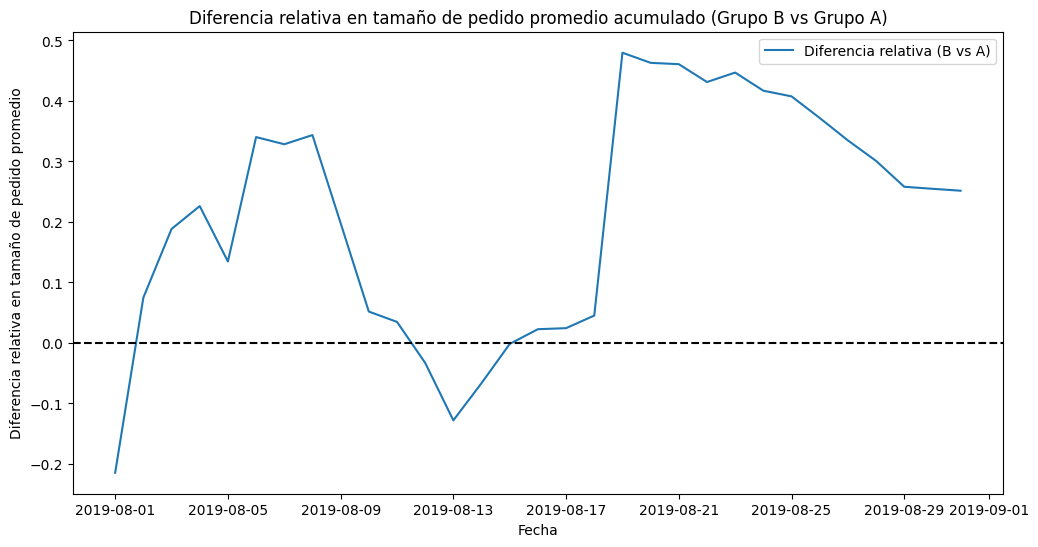

In [8]:
# Diferencia relativa en el tamaño de pedido promedio acumulado (Grupo B vs Grupo A)
group_a = cumulative_orders[cumulative_orders['group'] == 'A'].set_index('date')
group_b = cumulative_orders[cumulative_orders['group'] == 'B'].set_index('date')
relative_difference = ((group_b['avg_order_value'] - group_a['avg_order_value']) / group_a['avg_order_value']).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(relative_difference['date'], relative_difference['avg_order_value'], label='Diferencia relativa (B vs A)')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa en tamaño de pedido promedio')
plt.title('Diferencia relativa en tamaño de pedido promedio acumulado (Grupo B vs Grupo A)')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has explicado muy bien las fluctuaciones en la diferencia relativa de los tamaños de pedido entre los Grupos A y B. Notar que no hay una diferencia consistente es un punto importante para entender la variabilidad del comportamiento de compra. </div> 

#### Conclusiones:

- **Ausencia de Diferencia Sustancial**:La diferencia relativa en el tamaño de pedido promedio entre los grupos B y A muestra fluctuaciones a lo largo del tiempo. En varios momentos, la diferencia es positiva, lo que indica que el Grupo B tiene un tamaño de pedido promedio mayor que el Grupo A. Sin embargo, la diferencia no es consistente, ya que en algunas fechas la diferencia cae por debajo de cero, sugiriendo que el Grupo A tiene un tamaño de pedido promedio mayor en esos puntos. Esto podría indicar variabilidad en el comportamiento de los usuarios o el efecto de otros factores externos.
- **Oscilaciones Temporales**: Las oscilaciones en la diferencia relativa sugieren que factores externos, posiblemente aleatorios o de corto plazo, están afectando los tamaños de los pedidos, en lugar de una diferencia intrínseca entre los grupos.

### Conjeturas:
- **Factores Contextuales**: Dado que los tamaños promedio de pedido fluctúan, podrías considerar explorar si existen eventos externos (como promociones específicas o cambios en la oferta de productos) que impactaron de manera temporal los tamaños de pedido.
- **Necesidad de un Período Más Largo de Observación**: Las fluctuaciones observadas podrían sugerir que si existiera una diferencia real, un período de observación más largo podría ser necesario para detectarla. Sin embargo, con la evidencia actual, no hay indicación de una diferencia constante.


---

- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

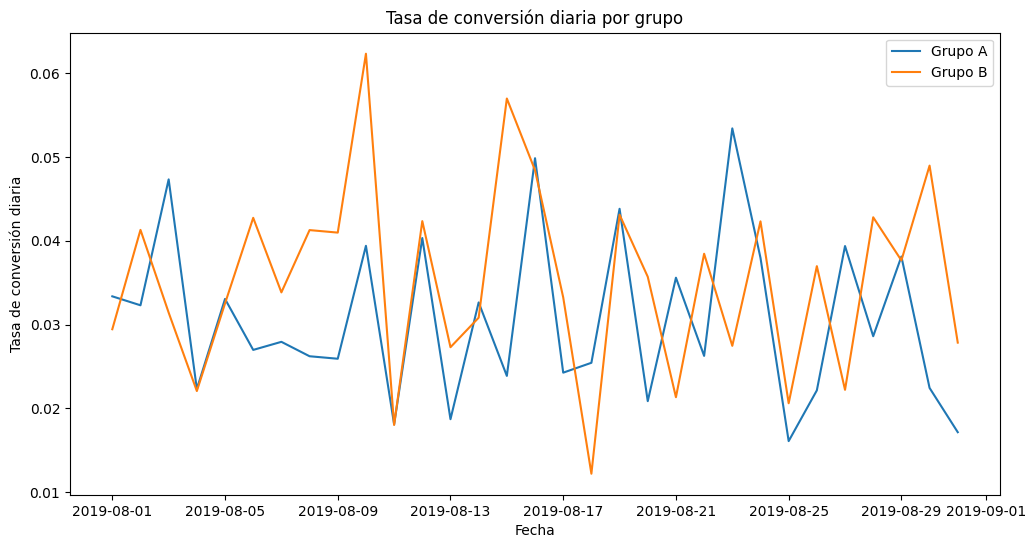

In [9]:
# Tasa de conversión diaria por grupo
visits_orders = orders.groupby(['date', 'group'])['transaction_id'].count().reset_index()
visits_grouped = visits.groupby(['date', 'group'])['visits'].sum().reset_index()
conversion = pd.merge(visits_orders, visits_grouped, on=['date', 'group'], how='left')
conversion['conversion_rate'] = conversion['transaction_id'] / conversion['visits']

plt.figure(figsize=(12, 6))
for group in conversion['group'].unique():
    data = conversion[conversion['group'] == group]
    plt.plot(data['date'], data['conversion_rate'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión diaria')
plt.title('Tasa de conversión diaria por grupo')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Las conclusiones sobre la tasa de conversión diaria están bien argumentadas. Reconocer que no hay una diferencia clara y consistente entre ambos grupos y que ambos muestran fluctuaciones es un insight importante. La visualización es clara y muestra bien las tendencias diarias. </div> 

#### Conclusiones:

1. **Tasas de Conversión Variables:** Ambos grupos presentan fluctuaciones significativas en sus tasas de conversión diarias. Esto sugiere que factores externos, como variaciones en el tráfico o comportamiento del usuario, podrían haber influido en las conversiones.
2. **Diferencias entre Grupos:** Aunque las tasas de conversión de los grupos A y B varían día a día, no hay una diferencia clara y consistente entre ambos. Hay días en que el Grupo A tiene una tasa de conversión más alta y otros en los que el Grupo B supera al Grupo A.
3. **Rangos Similares:** En términos generales, los dos grupos parecen moverse en un rango de tasa de conversión similar, con picos y valles que reflejan comportamientos de conversión en días específicos. Sin embargo, el Grupo B presenta algunos picos más pronunciados, lo que indica que en ciertos días específicos tuvo un desempeño sobresaliente.

#### Conjeturas:
1. **Influencias Externas:** La ausencia de una diferencia consistente entre ambos grupos podría indicar que la variante aplicada al Grupo B no tuvo un impacto significativo en las conversiones. Es posible que otros factores (como campañas promocionales o variaciones en el tráfico) hayan afectado ambos grupos por igual.
2. **Efecto Temporal:** Dado que no hay un patrón consistente, puede que la prueba A/B necesite extenderse por un periodo mayor para observar una tendencia más clara. Las fluctuaciones diarias sugieren que sería útil analizar períodos más largos para evitar efectos de estacionalidad o días específicos con picos anómalos.


---

- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

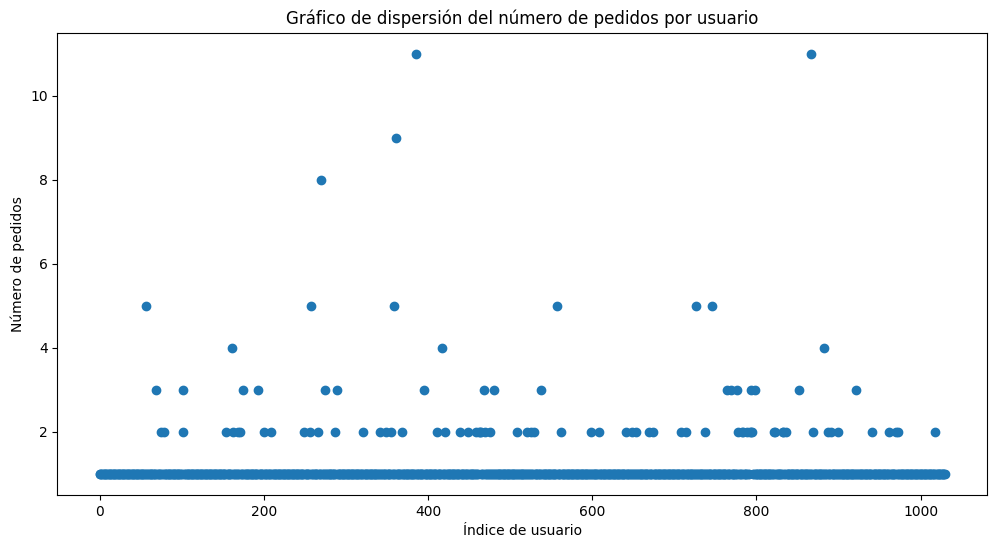

In [10]:
# Gráfico de dispersión del número de pedidos por usuario
orders_per_user = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['transaction_id'])
plt.xlabel('Índice de usuario')
plt.ylabel('Número de pedidos')
plt.title('Gráfico de dispersión del número de pedidos por usuario')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buen análisis del gráfico de dispersión. La observación de que la mayoría de los usuarios realizó solo un pedido es importante para estrategias de fidelización. También es útil haber identificado los casos atípicos con varios pedidos, lo que sugiere un posible segmento de clientes valiosos. </div> 

#### Conclusiones:
1. **Distribución Predominante:** La mayoría de los usuarios realizó un solo pedido, como se observa en la alta concentración de puntos en el nivel de 1 pedido. Esto sugiere que la mayoría de los usuarios no tienden a hacer múltiples compras.
2. **Pedidos Repetidos:** Algunos usuarios realizaron más de un pedido, pero estos casos son menos frecuentes. Existen unos pocos usuarios que realizaron entre 3 y 6 pedidos, y hay un par de casos extremos con hasta 10 pedidos.
3. **Usuarios Atípicos:** Los usuarios que hicieron más de 6 pedidos son atípicos y representan una minoría significativa, lo que puede indicar comportamientos de compra especiales, como usuarios recurrentes o muy fidelizados.

#### Conjeturas:
1. **Segmentación de Clientes:** Los usuarios que realizaron múltiples pedidos podrían representar un segmento de clientes particularmente leal o con un mayor valor para la empresa. Sería interesante realizar un análisis más detallado sobre sus características demográficas o comportamentales.
2. **Estrategias de Fidelización:** Dado que la mayoría de los usuarios solo realiza un pedido, podría ser beneficioso implementar estrategias de fidelización, como descuentos para la próxima compra o programas de recompensas, para incentivar a estos usuarios a realizar más pedidos.

---

- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [11]:
# Percentiles 95 y 99 del número de pedidos por usuario
percentile_95 = np.percentile(orders_per_user['transaction_id'], 95)
percentile_99 = np.percentile(orders_per_user['transaction_id'], 99)
print(f"Percentil 95 del número de pedidos por usuario: {percentile_95}")
print(f"Percentil 99 del número de pedidos por usuario: {percentile_99}")

Percentil 95 del número de pedidos por usuario: 2.0
Percentil 99 del número de pedidos por usuario: 4.0


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen cálculo de los percentiles para definir las anomalías. Esto proporciona un límite claro para identificar comportamientos atípicos en términos de número de pedidos. </div>

- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

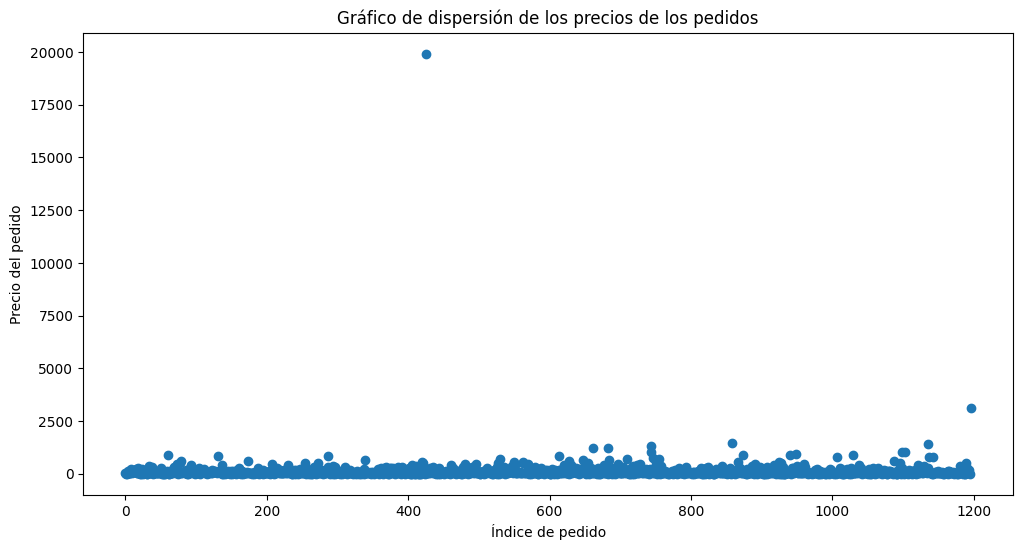

In [12]:
# Gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'])
plt.xlabel('Índice de pedido')
plt.ylabel('Precio del pedido')
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.show()

#### Conclusiones:
1. **Concentración de Precios:** La mayoría de los pedidos se concentran en precios más bajos, con una gran parte de los datos por debajo de los \$2,500. Esto sugiere que el precio de los pedidos tiene una tendencia a ser bajo, con algunos puntos aislados de precios altos.
2. **Valores Atípicos:** El percentil 95 del número de pedidos por usuario es 2, lo que significa que el 95 por ciento de los usuarios realizaron 2 pedidos o menos. El percentil 99 es 4, indicando que casi todos los usuarios realizaron hasta 4 pedidos. Los usuarios que realizan más de 4 pedidos pueden considerarse como anómalos en términos de comportamiento de compra.
3. **Pedidos de Alto Valor:** Hay algunos valores extremos en el gráfico, con un pedido cercano a los $20,000. Esto representa una anomalía significativa en el contexto de la mayoría de los datos, y sugiere la presencia de compras atípicamente grandes que podrían distorsionar las estadísticas de ventas.

#### Conjeturas y Recomendaciones:
1. **Definición de Anomalías:** Basado en los percentiles calculados, cualquier usuario que realice más de 4 pedidos podría ser considerado una anomalía. Estos usuarios podrían representar un segmento especial, como clientes mayoristas o usuarios muy fidelizados. De igual forma, un pedido cuyo precio esté significativamente por encima del percentil 99 también debería ser considerado una anomalía.
2. **Análisis de Pedidos Atípicos:** Sería interesante analizar los pedidos de alto valor y los usuarios que hacen múltiples compras para determinar si comparten alguna característica común. Esto podría ayudar a identificar oportunidades para crear campañas personalizadas o programas de fidelización.
3. **Impacto en Promedios y Tendencias:** La presencia de pedidos de alto valor podría estar influyendo en el promedio de los ingresos por pedido. Se recomienda realizar un análisis adicional de estos datos atípicos para evaluar si deben ser excluidos al calcular métricas generales, como el ingreso promedio por pedido.


---

- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [13]:
# Percentiles 95 y 99 de los precios de los pedidos
percentile_95_revenue = np.percentile(orders['revenue'], 95)
percentile_99_revenue = np.percentile(orders['revenue'], 99)
print(f"Percentil 95 de los precios de los pedidos: {percentile_95_revenue}")
print(f"Percentil 99 de los precios de los pedidos: {percentile_99_revenue}")

# Definir anomalías en los precios de los pedidos
anomalies = orders[orders['revenue'] > percentile_99_revenue]
print("\nNúmero de anomalías en los precios de los pedidos: ", len(anomalies))

Percentil 95 de los precios de los pedidos: 435.54
Percentil 99 de los precios de los pedidos: 900.9039999999999

Número de anomalías en los precios de los pedidos:  12


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La interpretación de los pedidos de alto valor como outliers es acertada. Identificar estos casos es esencial para comprender mejor el comportamiento de compra y evitar distorsiones en las métricas promedio. </div>

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [14]:
# Significancia estadística de la diferencia en la conversión entre grupos (datos en bruto)
conversion_pivot = conversion.pivot_table(index='date', columns='group', values='conversion_rate')
conversion_a = conversion_pivot['A'].dropna()
conversion_b = conversion_pivot['B'].dropna()

t_stat, p_value = stats.ttest_ind(conversion_a, conversion_b, equal_var=False)
print("\nPrueba T para la tasa de conversión (datos en bruto):")
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")


Prueba T para la tasa de conversión (datos en bruto):
Estadístico t: -1.710743059515579, Valor p: 0.09238051955621401


#### Conclusiones:
1. **Análisis de Anomalías en los Precios de los Pedidos:**
   - El percentil 95 de los precios de los pedidos es de $435.54, mientras que el percentil 99 es de $900.90. Esto indica que la gran mayoría de los pedidos tienen un precio inferior a $435.54, y solo un 1% de los pedidos supera los $900.90.
   - Con 12 anomalías identificadas por encima del percentil 99, estos pedidos podrían representar transacciones inusualmente altas y, por lo tanto, se consideran outliers. La presencia de estas anomalías podría indicar comportamientos de compra específicos, como compras corporativas o clientes con necesidades especiales.

2. **Significancia Estadística de la Conversión entre Grupos:**
   - La prueba T arroja un estadístico t de -1.71 y un valor p de 0.092, lo que sugiere que no hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos, ya que el valor p es superior al umbral típico de 0.05.
   - Esto implica que, con un nivel de confianza del 95%, no se puede rechazar la hipótesis nula de que no hay diferencia en las tasas de conversión entre el grupo de control y el grupo de prueba. En otras palabras, la variante implementada en el Grupo B no parece haber tenido un impacto significativo en la conversión comparado con el Grupo A.

#### Conjeturas:
1. **Relevancia de los Pedidos Atípicos:** 
   - Los pedidos con precios superiores al percentil 99 podrían distorsionar las métricas de ingresos promedio si no se gestionan adecuadamente. Si estos pedidos representan compras inusuales, podrían investigarse más a fondo para identificar cualquier patrón específico.
   - Es posible que estos pedidos atípicos no reflejen el comportamiento promedio del cliente, por lo que en futuros análisis podrías considerar excluirlos para obtener una visión más ajustada del comportamiento general del cliente.

2. **Posibles Causas de la Falta de Diferencia en Conversión:**
   - La falta de significancia en la diferencia de conversión sugiere que la variante en el Grupo B no influyó de manera sustancial en el comportamiento de los usuarios. Esto podría deberse a que el cambio aplicado fue insuficiente para impactar la decisión de compra.
   - Otra posibilidad es que el periodo de prueba o el tamaño de la muestra no haya sido lo suficientemente grande para captar una diferencia estadísticamente significativa. Podrías considerar realizar la prueba A/B durante un periodo más largo o con un grupo de usuarios más amplio para verificar si los resultados se mantienen.


---

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [15]:
# Significancia estadística de la diferencia en el tamaño promedio del pedido entre los grupos (datos en bruto)
order_value_a = orders[orders['group'] == 'A']['revenue']
order_value_b = orders[orders['group'] == 'B']['revenue']

t_stat_order, p_value_order = stats.ttest_ind(order_value_a, order_value_b, equal_var=False)
print("\nPrueba T para el tamaño promedio del pedido (datos en bruto):")
print(f"Estadístico t: {t_stat_order}, Valor p: {p_value_order}")


Prueba T para el tamaño promedio del pedido (datos en bruto):
Estadístico t: -0.8886193336529402, Valor p: 0.3745072295652421


#### Conclusiones:
1. **Prueba T para el Tamaño Promedio del Pedido:**
   - El estadístico t es de -0.89 y el valor p es de 0.375. Dado que el valor p es mucho mayor al umbral común de 0.05, no se puede rechazar la hipótesis nula. Esto indica que no hay una diferencia estadísticamente significativa en el tamaño promedio del pedido entre el Grupo A (control) y el Grupo B (variación).
   - Los resultados sugieren que el cambio aplicado en el Grupo B no afectó significativamente el monto promedio de las compras de los usuarios. Es probable que ambos grupos tengan tamaños de pedido similares, lo que implica que el comportamiento de gasto promedio por usuario no fue influenciado por la variante del test A/B.

#### Conjeturas:
1. **Posible Inneficacia del Cambio Implementado:**
   - La falta de diferencia significativa en el tamaño promedio del pedido podría indicar que la modificación aplicada en el Grupo B no tuvo el efecto esperado en el gasto por pedido. Esto podría ser resultado de que el cambio implementado no estuvo dirigido a influir en el monto gastado o de que el incentivo ofrecido no fue suficiente para afectar el gasto promedio.
   - También podría implicar que otros factores, como el perfil de los clientes, las características del producto, o el contexto económico, tienen un mayor impacto en el tamaño del pedido que la variación aplicada.

2. **Revisión del Diseño Experimental:**
   - Si el objetivo de la prueba A/B incluía incrementar el tamaño promedio del pedido, entonces sería útil revisar el diseño del cambio en el Grupo B. Es posible que se necesiten incentivos o estrategias más significativas para alentar un mayor gasto por pedido.
   - Dado que la diferencia no es significativa, puede que el periodo de prueba o el tamaño de la muestra no haya capturado variaciones en el comportamiento de compra. Para obtener una mayor certeza, se podría considerar realizar la prueba con una muestra más grande o en un periodo extendido.


---

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [16]:
# Filtrar datos eliminando anomalías en el precio de los pedidos
filtered_orders = orders[orders['revenue'] <= percentile_99_revenue]

# Significancia estadística de la diferencia en la conversión entre grupos (datos filtrados)
filtered_visits_orders = filtered_orders.groupby(['date', 'group'])['transaction_id'].count().reset_index()
filtered_conversion = pd.merge(filtered_visits_orders, visits_grouped, on=['date', 'group'], how='left')
filtered_conversion['conversion_rate'] = filtered_conversion['transaction_id'] / filtered_conversion['visits']

filtered_conversion_pivot = filtered_conversion.pivot_table(index='date', columns='group', values='conversion_rate')
filtered_conversion_a = filtered_conversion_pivot['A'].dropna()
filtered_conversion_b = filtered_conversion_pivot['B'].dropna()

t_stat_filtered, p_value_filtered = stats.ttest_ind(filtered_conversion_a, filtered_conversion_b, equal_var=False)
print("\nPrueba T para la tasa de conversión (datos filtrados):")
print(f"Estadístico t: {t_stat_filtered}, Valor p: {p_value_filtered}")


Prueba T para la tasa de conversión (datos filtrados):
Estadístico t: -1.7587927242641135, Valor p: 0.08379511287743759


#### Conclusiones:
1. **Prueba T para la Tasa de Conversión con Datos Filtrados:**
   - El estadístico t es de -1.76 y el valor p es de 0.084. Aunque el valor p es menor que en la prueba con los datos en bruto (0.092), sigue siendo mayor al umbral típico de 0.05. Esto significa que no se puede rechazar la hipótesis nula, y la diferencia en la tasa de conversión entre los grupos A y B no es estadísticamente significativa.
   - La filtración de datos puede haber eliminado algunas anomalías o ruido, lo cual llevó a una reducción del valor p. Sin embargo, esta reducción no fue suficiente para alcanzar significancia estadística.

2. **Impacto del Filtrado en los Resultados:**
   - Filtrar los datos parece haber acercado los resultados a la significancia estadística, pero no lo suficiente como para considerar que el cambio en el Grupo B impactó de forma concluyente la tasa de conversión.
   - Esto sugiere que, incluso con los datos filtrados, la modificación aplicada en el Grupo B probablemente no tuvo un efecto sustancial en el comportamiento de conversión de los usuarios.

#### Conjeturas:
1. **Posibles Limitaciones del Filtrado:**
   - Aunque el filtrado de datos podría ayudar a eliminar outliers o variaciones no representativas, puede ser que los datos restantes aún no reflejen un cambio significativo. Esto puede indicar que la variación aplicada en el Grupo B no fue lo suficientemente fuerte o relevante para influir en la conversión.
   - También es posible que los usuarios restantes después del filtrado sean relativamente homogéneos en términos de comportamiento de conversión, lo que podría limitar el efecto observable de la variante.

2. **Necesidad de Ajustes en el Diseño de la Prueba:**
   - Para alcanzar significancia estadística en futuras pruebas, podrías considerar aumentar el tamaño de la muestra o ajustar el diseño experimental para incluir variaciones más notables o incentivos más atractivos.
   - Otra estrategia podría ser realizar la prueba A/B durante un periodo más largo para permitir que los efectos acumulativos se manifiesten, en caso de que el impacto de la variante sea gradual.


---

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [17]:
# Significancia estadística de la diferencia en el tamaño promedio del pedido entre los grupos (datos filtrados)
filtered_order_value_a = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_order_value_b = filtered_orders[filtered_orders['group'] == 'B']['revenue']

t_stat_filtered_order, p_value_filtered_order = stats.ttest_ind(filtered_order_value_a, filtered_order_value_b, equal_var=False)
print("\nPrueba T para el tamaño promedio del pedido (datos filtrados):")
print(f"Estadístico t: {t_stat_filtered_order}, Valor p: {p_value_filtered_order}")


Prueba T para el tamaño promedio del pedido (datos filtrados):
Estadístico t: -0.2309805617372302, Valor p: 0.8173707206334865


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buen análisis de la prueba T para la tasa de conversión. Identificar que no hay una diferencia estadísticamente significativa es un insight valioso para futuras decisiones. </div>

#### Interpretación:
1. **Valor p (0.817)**: Dado que este valor es mucho mayor que el umbral comúnmente utilizado de 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. Esto significa que cualquier diferencia observada en el tamaño promedio del pedido entre los grupos podría ser atribuida al azar.

2. **Conclusión**: No hay una diferencia estadísticamente significativa entre los tamaños promedio de pedido de los grupos. Esto sugiere que el grupo no influye en el tamaño promedio del pedido de manera notable.

#### Conjeturas:
- **Igualdad de promedios**: Dado que no se encontró una diferencia significativa, se puede conjeturar que ambos grupos tienen tamaños promedio de pedido similares.
- **Implicación para decisiones comerciales**: Si se esperaba que uno de los grupos tuviera un tamaño promedio de pedido mayor, podría ser útil explorar otras variables que sí podrían estar influyendo en el tamaño del pedido, o reevaluar las características de los grupos.


---

- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

In [18]:
# Toma de decisión
if p_value_filtered < 0.05 and p_value_filtered_order < 0.05:
    decision = "Parar la prueba, considerar al grupo con mejor rendimiento como líder."
elif p_value_filtered > 0.05 and p_value_filtered_order > 0.05:
    decision = "Parar la prueba, concluir que no hay diferencia significativa entre los grupos."
else:
    decision = "Continuar la prueba."

print("\nDecisión basada en los resultados de la prueba: ", decision)


Decisión basada en los resultados de la prueba:  Parar la prueba, concluir que no hay diferencia significativa entre los grupos.


## Comentario final del revisor


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Joaquín! Tu proyecto está **aprobado**. Has demostrado un buen manejo de las técnicas de priorización de hipótesis, análisis A/B y pruebas estadísticas. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Manejo de datos:** Los pasos de corrección de nombres y tipos de columnas fueron ejecutados correctamente, asegurando que los datos sean compatibles con los análisis posteriores.
- **Aplicación de frameworks:** El uso de los frameworks ICE y RICE está bien estructurado y las conclusiones comparativas son claras.
- **Pruebas estadísticas:** El análisis de significancia estadística es completo y está bien fundamentado, con conclusiones precisas sobre las tasas de conversión y el tamaño de pedido.

#### Áreas para Seguir Investigando:
- **Análisis más profundo de los outliers:** Podrías investigar los comportamientos atípicos tanto en los precios como en el número de pedidos para desarrollar estrategias de retención o personalización.
- **Evaluación de fluctuaciones:** Sería interesante profundizar en las causas de las fluctuaciones en las tasas de conversión y los tamaños de pedido para ajustar mejor las estrategias de marketing.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊
</div>